In [1]:
!wget http://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip

--2023-12-31 10:29:07--  http://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘combined+cycle+power+plant.zip’

combined+cycle+powe     [   <=>              ]   3.50M  5.81MB/s    in 0.6s    

2023-12-31 10:29:08 (5.81 MB/s) - ‘combined+cycle+power+plant.zip’ saved [3674852]



In [2]:
!unzip /content/combined+cycle+power+plant.zip -d /content/data

Archive:  /content/combined+cycle+power+plant.zip
   creating: /content/data/CCPP/
  inflating: /content/data/CCPP/Folds5x2_pp.ods  
  inflating: /content/data/CCPP/Folds5x2_pp.xlsx  
  inflating: /content/data/CCPP/Readme.txt  
  inflating: /content/data/CCPP/Readme.txt~  


In [3]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [1]:
import keras as K
from keras.layers import Dense, Input
print(K.__version__)


3.0.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [3]:
file_path = '/content/data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
train_test_split(X_new, Y_new, test_size=0.4, random_state=333)


In [5]:
X_train.shape[1]

4

In [6]:
regressor = K.Sequential()
regressor.add(Input(shape=(X_train.shape[1],)))
regressor.add(Dense(3))
regressor.add(Dense(1))


In [7]:
regressor.compile(optimizer='sgd', loss='mse')

In [8]:
history = regressor.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0637
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0276
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080
Epoch 9/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077
Epoch 10/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0070
Epoch 11/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0064
Epoch 12/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060
Epoch 13/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061  
Epoch 14/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0056
Epoch 15/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 991us

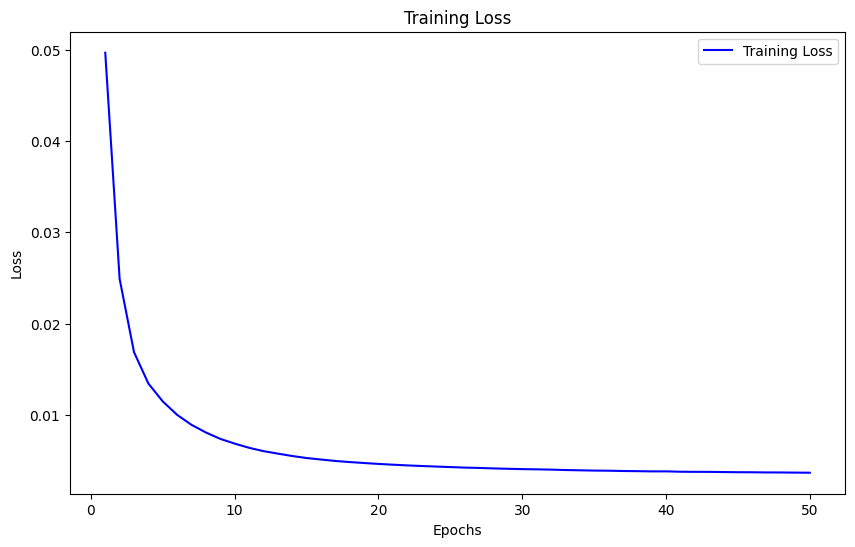

In [9]:
loss = history.history['loss']

# Creating a range object for the number of epochs
epochs = range(1, len(loss) + 1)

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
y_pred = regressor.predict(X_test)

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


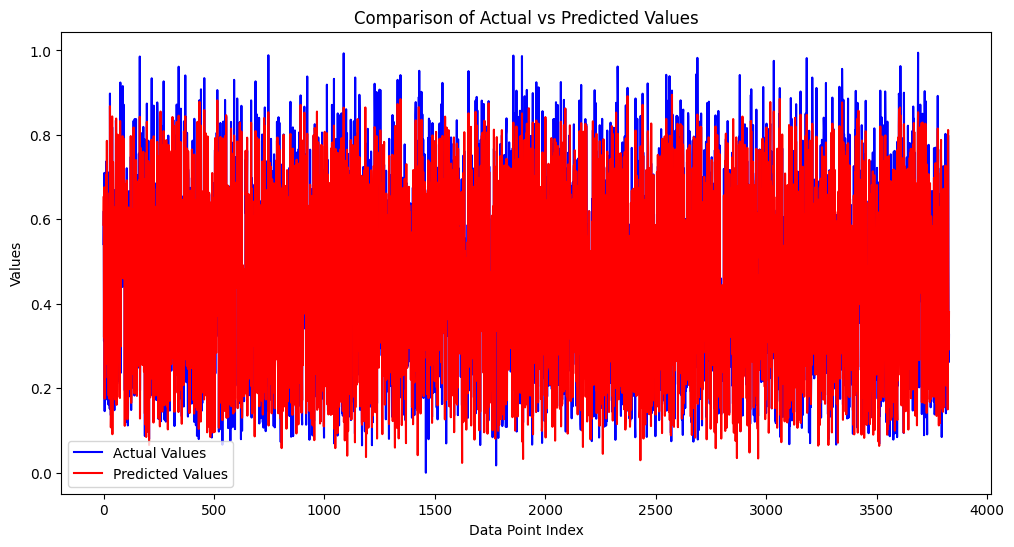

In [12]:
# Creating a range for the x-axis
x_range = range(len(y_test))

# Plotting the actual values
plt.figure(figsize=(12, 6))
plt.plot(x_range, y_test, 'b-', label='Actual Values')

# Plotting the predicted values
plt.plot(x_range, y_pred, 'r-', label='Predicted Values')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()

# Showing the plot
plt.show()

In [13]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared value: 0.923492052621181
Mean Squared Error: 0.00393774675747592
